# Loading the dataset 

**Importing all the necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import time
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import plot_confusion_matrix
import plotly.figure_factory as ff


**Mounting google drive to access files**



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Specifying patch where the API tolken is stored along with where we will store the dataset**

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

**Changing working directory to that folder**

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


**Checking if we are in the correct directory**

In [ ]:
pwd

'/content/gdrive/My Drive/Kaggle'

**Downloading the dataset**

In [ ]:
# !kaggle datasets download -d ronitf/heart-disease-ucim

**Extracting the dataset and removing the compressed file**

In [ ]:
# !unzip \*.zip  && rm *.zip

**Importing the dataset**

In [ ]:
df = pd.read_csv("./heart.csv")

# Data Analysis

**Visiualising the number of males vs females in the dataset**

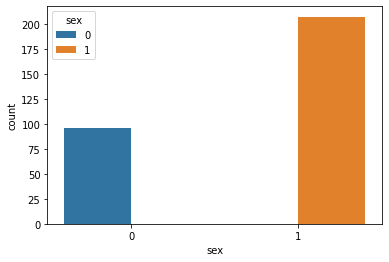

In [ ]:
sex_counts = data['sex'].value_counts().tolist()
sns.countplot(x='sex', hue="sex", data=data)

*There is a skew in the number of males vs females*

**Visualising the Age of the people in the dataset**

In [ ]:
ff.create_distplot([data['age']], group_labels=['age'],
                         bin_size=10, show_rug=False)

*The dataset contains people with varied ages, which is a good thing forthe model to generalise better*

**Lets see the correlation between the different attributes**

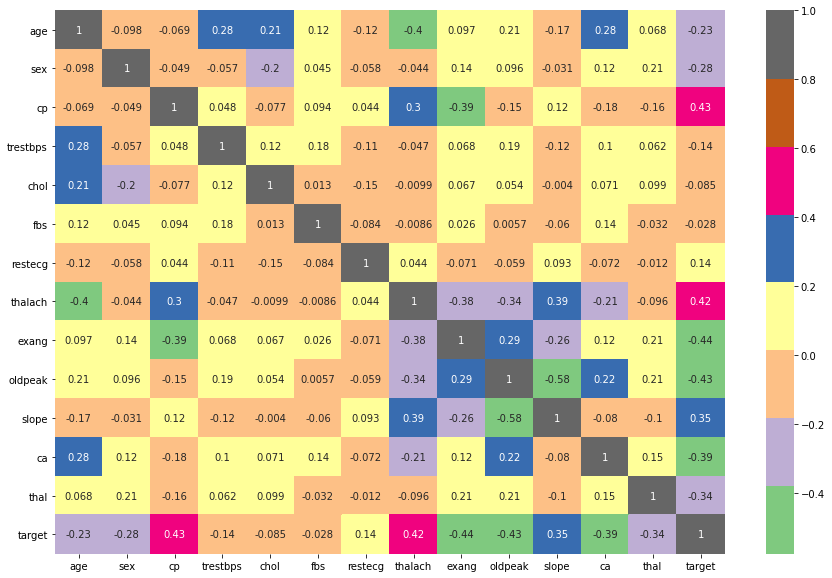

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Accent',annot=True)

# Data Preprocessing

**Seperating the data from the label**

In [ ]:
target_name = "target"
target = df[target_name]
data = df.drop(columns=[target_name, ])
data.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]>

**Specifying which coloumns are numerical and which ones are categorical**

In [ ]:
numerical_columns = [
    "age", "trestbps", "chol", "thalach","oldpeak"]
categorical_columns = [
    "sex", "cp", "fbs", "restecg","exang","thal","ca"]

**Assigning preprocessors for the numerical and categorical data**

In [ ]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])

**Test Train Split**

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

# Logictic Regression

**Making the pipeline**

In [ ]:
logisticRegr = make_pipeline(preprocessor, LogisticRegression())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'thal',
                                                   'ca']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
logisticRegr.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'thal',
                                                   'ca']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('logisticregression', LogisticRegression())])>

**Setting up Grid Search for hyper paramter tuning**

In [ ]:
grid_values_lr = {'logisticregression__C':[0.001,.009,0.01,.09,1,5,10,25]}
logisticRegr_gs = GridSearchCV(logisticRegr, param_grid=grid_values_lr,n_jobs=4, cv=5)
logisticRegr_gs

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'exang',
                                                                          'thal',
                                                                          'ca']),
                                                                        ('standard-scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          'oldpeak'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=4,
             param_grid={'logisticregression__C': [0.001, 0.009, 0.01, 0.09, 1,
                                                   5, 10, 25]})

In [ ]:
# logisticRegr_gs.get_params().keys()

**Training the model**

In [ ]:
logisticRegr_gs.fit(data_train,target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'exang',
                                                                          'thal',
                                                                          'ca']),
                                                                        ('standard-scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          'oldpeak'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=4,
             param_grid={'logisticregression__C': [0.001, 0.009, 0.01, 0.09, 1,
                                                   5, 10, 25]})

**Getting the best value of the hyperparameter**

In [ ]:
logisticRegr_gs.best_params_

{'logisticregression__C': 0.09}

**Plotting Confusion Matrix**

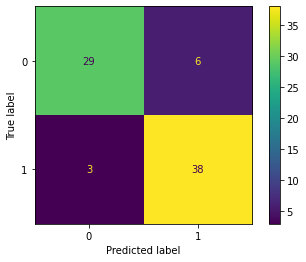

In [ ]:
plot_confusion_matrix(logisticRegr_gs, data_test, target_test) 

**Running Cross Validation**

In [ ]:
cv_result_lr = cross_validate(logisticRegr_gs.best_estimator_, data, target, cv=5)

**Printing the Score**

In [ ]:
scores = cv_result_lr["test_score"]
print(f"The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.838 +/- 0.043


# Gradient Boosting Classifier

**Making the pipeline**

In [ ]:
Gradientbst = make_pipeline(preprocessor, GradientBoostingClassifier())

In [ ]:
Gradientbst.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'thal',
                                                   'ca']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])>

**Setting up Grid Search for hyper paramter tuning**

In [ ]:
grid_values_gb = {'gradientboostingclassifier__learning_rate':[0.001,.009,0.01,.09,1,5,10,25]}
Gradientbst_gs = GridSearchCV(Gradientbst, param_grid=grid_values_gb,n_jobs=4, cv=10)
Gradientbst_gs

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'exang',
                                                                          'thal',
                                                                          'ca']),
                                                                        ('standard-scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          'oldpeak'])])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=4,
             param_grid={'gradientboostingclassifier__learning_rate': [0.001,
                                                                       0.009,
                                                                       0.01,
                                                                       0.09, 1,
                                                                       5, 10,
                                                                       25]})

**Training the model**

In [ ]:
Gradientbst_gs.fit(data_train,target_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'exang',
                                                                          'thal',
                                                                          'ca']),
                                                                        ('standard-scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          'oldpeak'])])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=4,
             param_grid={'gradientboostingclassifier__learning_rate': [0.001,
                                                                       0.009,
                                                                       0.01,
                                                                       0.09, 1,
                                                                       5, 10,
                                                                       25]})

**Plotting Confusion Matrix**



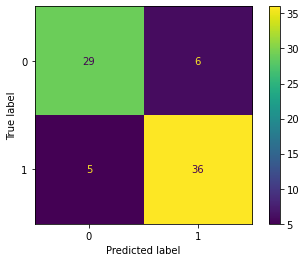

In [ ]:
plot_confusion_matrix(Gradientbst_gs, data_test, target_test) 

**Getting the best value of the hyperparameter**

In [ ]:
Gradientbst_gs.best_params_

{'gradientboostingclassifier__learning_rate': 0.009}

**Running Cross Validation**

In [ ]:
cv_result_gb = cross_validate(Gradientbst_gs, data, target, cv=5)

**Printing the Score**

In [ ]:
scores = cv_result_gb["test_score"]
print(f"The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.812 +/- 0.054
